### Load Clean Dataset here

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../notebooks/solana_clean_dataset.csv", parse_dates=['Open time'])

df = df.set_index('Open time')
df.head()

,Close,Volume,return_pct,volatility_pct,market_state,day_name,month,year
Open time,,,,,,,,
2020-08-11,3.2985,1552384.78,15.736842,23.771930,Bear,Tuesday,8,2020
2020-08-12,3.7558,1737042.95,13.863878,25.735941,Bear,Wednesday,8,2020
2020-08-13,3.7300,1685759.24,-0.533333,17.024000,Bear,Thursday,8,2020
2020-08-14,3.4099,1474161.79,-8.353267,12.003118,Bear,Friday,8,2020
2020-08-15,3.1730,1070233.20,-7.170650,17.261051,Bear,Saturday,8,2020


### Analysing

In [6]:
summary = {
    "Total Days": len(df),
    "Start Price": df['Close'].iloc[0],
    "End Price": df['Close'].iloc[-1],
    "Total Return %": ((df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]) * 100,
    "Average Daily Return %": df['return_pct'].mean(),
    "Average Volatility %": df['volatility_pct'].mean()
}

summary

{'Total Days': 2020,
 'Start Price': np.float64(3.2985),
 'End Price': np.float64(83.04),
 'Total Return %': np.float64(2417.507958162801),
 'Average Daily Return %': np.float64(0.38566414758222495),
 'Average Volatility %': np.float64(8.63007189731777)}

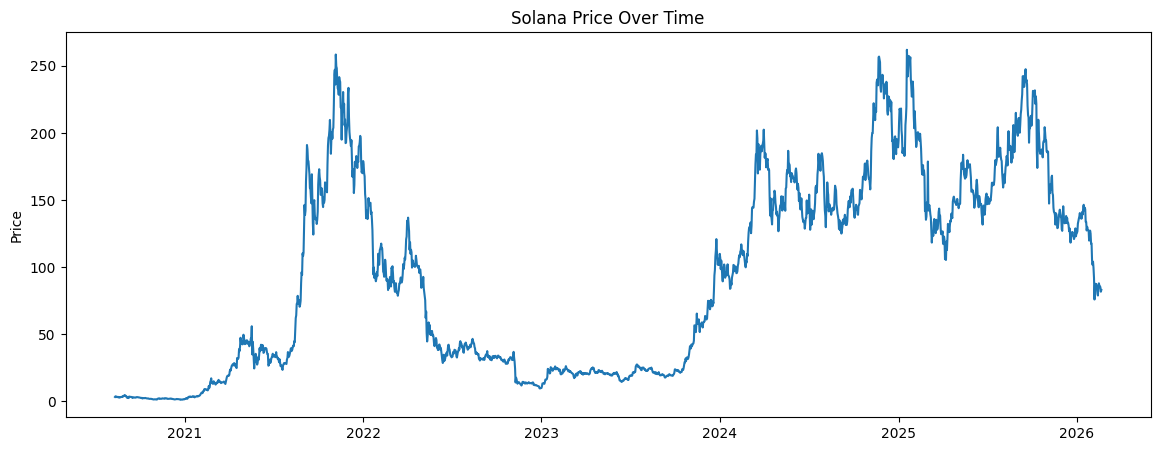

In [7]:
plt.figure(figsize=(14,5))
plt.plot(df['Close'])
plt.title("Solana Price Over Time")
plt.ylabel("Price")
plt.show()

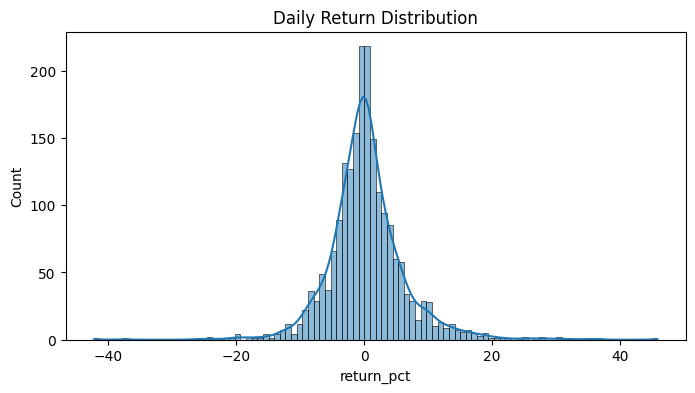

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['return_pct'], bins=100, kde=True)
plt.title("Daily Return Distribution")
plt.show()

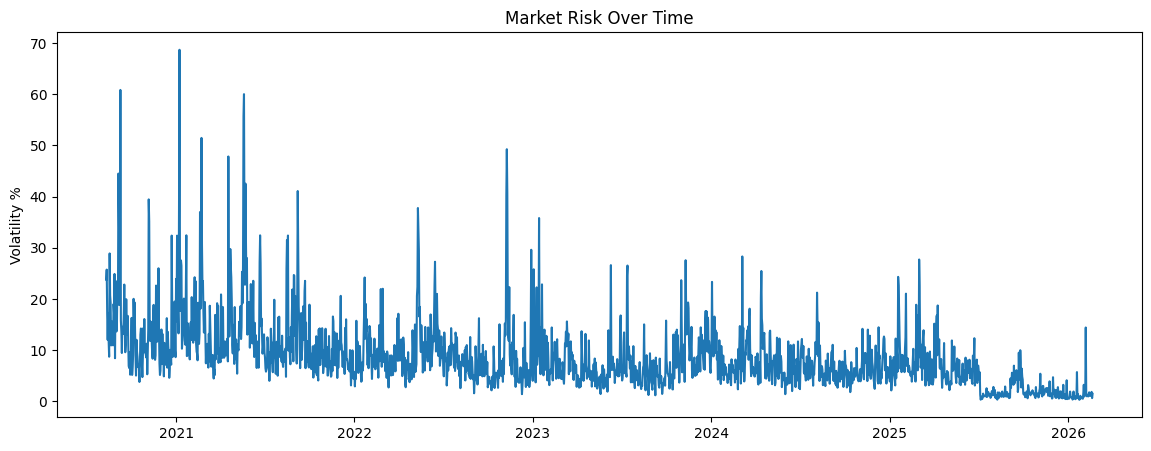

In [9]:
plt.figure(figsize=(14,5))
plt.plot(df['volatility_pct'])
plt.title("Market Risk Over Time")
plt.ylabel("Volatility %")
plt.show()

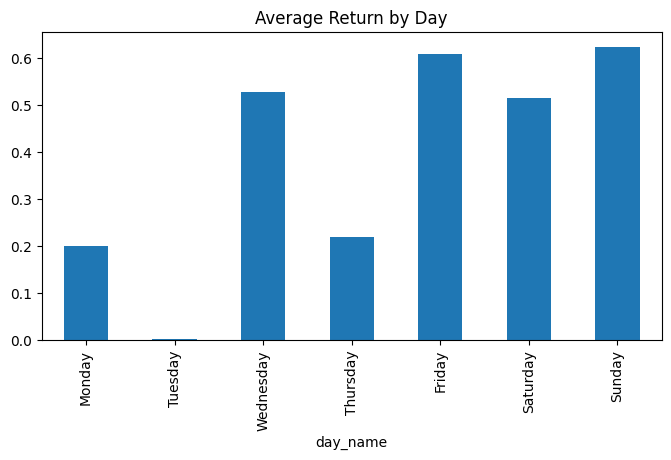

In [10]:
weekday = df.groupby('day_name')['return_pct'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

weekday.plot(kind='bar', figsize=(8,4))
plt.title("Average Return by Day")
plt.show()

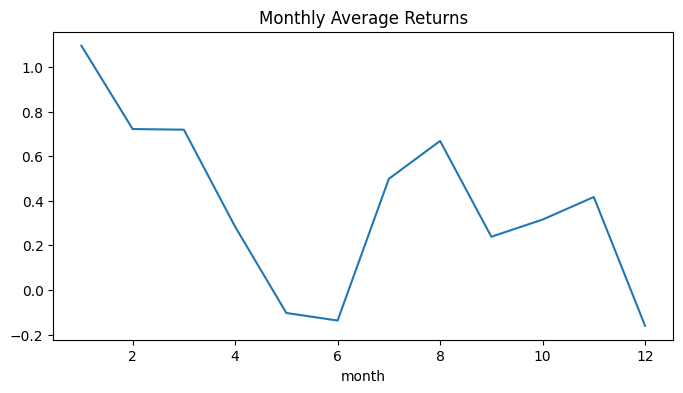

In [11]:
monthly = df.groupby('month')['return_pct'].mean()

monthly.plot(figsize=(8,4))
plt.title("Monthly Average Returns")
plt.show()

In [12]:
df.groupby('market_state')[['return_pct','volatility_pct']].mean()

,return_pct,volatility_pct
market_state,,
Bear,-0.042397,8.241681
Bull,0.845369,9.047174
